# Climate Change: Which African Country To Visit After COVID-19

### Motivation

Nowadays, we are in quarantine because of the COVID-19 Pandemic. Therefore, I was curious to learn how to write my first blog when completing my Data Scientist Nanodegree program with Udacity. As an African-Egyptian, I know that Africa has a lot of beautiful places. But, the common idea is that Africa is always warm. In this blog, I will analyze climate change data and provide you with countries to visit any time of the year in moderate temperatures.
If you are excited to know which country to visit in Africa after quarantine, let's continue your reading!

### Project Description

The goal of the project is to analyze climate data provided by Kaggle that contains monthly average temperature reading for countries. Then, provide you with the countries that have moderate temperature in each month.
I focused my work on trying to answer the following questions:
- What is the average temperature for countries since 1973?
- How does climate change over the years?
- Which countries to visit in a specific month?

### Data Overview:

You can find the Kaggle competition in the following link: https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data
- _GlobalLandTemperaturesByCountry.csv_ - Monthly average temperature per country.
- _Africa.csv_ - Manually collected information about African countries.
- _Seasons.csv_ - Manually collected data about seasons cycle per region.

Now let's have a peek at those datasets.

### Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('float_format', '{:f}'.format)
pd.set_option('max_columns',500)

In [2]:
import os
os.chdir('C:/Users/Andrew/Documents/Kaggle/Climate Change - Kaggle/Data')
Countries = pd.read_csv('GlobalLandTemperaturesByCountry.csv')

Let's have a look about our data descirption

In [3]:
Countries.sample(5)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
480526,1980-10-01,26.373000,0.337000,Solomon Islands
280097,1920-12-01,25.979000,0.786000,Kingman Reef
219848,1973-06-01,24.896000,0.156000,Guatemala
288207,1912-11-01,20.595000,0.429000,Laos
22120,1988-05-01,27.682000,0.209000,Anguilla


In [4]:
Countries.describe(include='all')

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
count,577462,544811.000000,545550.000000,577462
unique,3239,nan,nan,243
top,1969-01-01,nan,nan,Åland
freq,243,nan,nan,3239
mean,NaN,17.193354,1.019057,NaN
std,NaN,10.953966,1.201930,NaN
min,NaN,-37.658000,0.052000,NaN
25%,NaN,10.025000,0.323000,NaN
50%,NaN,20.901000,0.571000,NaN
75%,NaN,25.814000,1.206000,NaN


In [5]:
Countries["Country"].unique()

array(['Åland', 'Afghanistan', 'Africa', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica',
       'Antigua And Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Baker Island', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius And Saba', 'Bosnia And Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Bulgaria',
       'Burkina Faso', 'Burma', 'Burundi', "Côte D'Ivoire", 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros',
       'Congo (Democratic Republic Of The)', 'Congo', 'Costa Rica',
       'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic',
       'Denmark (Europe)', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecu

we need to select only African countries. So, we prepared an external file that is having all the countries in Africa with Regions

In [6]:
Africa = pd.read_csv('Africa.csv',encoding = 'unicode_escape')
Seasons = pd.read_csv('Seasons.csv',encoding = 'unicode_escape')

In [7]:
Africa.sample(5)

,Country,Region
29,Algeria,North Africa
50,Cape Verde,West Africa
60,Nigeria,West Africa
44,Zambia,Southern Africa
41,Namibia,Southern Africa


Now let's merge our data with the regions 

In [8]:
Seasons.sample(5)

,Region,Month,Season
19,West Africa,4,Spring
27,North Africa,6,Summer
28,Southern Africa,6,Winter
7,North Africa,2,Winter
17,North Africa,4,Spring


In [9]:
DataCountries = Countries.merge(Africa,how='left',on='Country')
DataCountries.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,551718.000000,552457.000000
mean,17.245756,1.014355
std,10.898062,1.195768
min,-37.658000,0.052000
25%,10.195000,0.324000
50%,20.885000,0.572000
75%,25.784000,1.196000
max,38.842000,15.003000


In [10]:
DataCountries.loc[DataCountries['Region'].isna()]['Country'].unique()

array(['Åland', 'Afghanistan', 'Africa', 'Albania', 'American Samoa',
       'Andorra', 'Anguilla', 'Antarctica', 'Antigua And Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Asia', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Baker Island', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius And Saba', 'Bosnia And Herzegovina',
       'Brazil', 'British Virgin Islands', 'Bulgaria', 'Burkina Faso',
       'Burma', 'Cambodia', 'Canada', 'Cayman Islands', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Curaçao', 'Cyprus', 'Czech Republic', 'Denmark (Europe)',
       'Denmark', 'Dominica', 'Dominican Republic', 'Ecuador',
       'El Salvador', 'Estonia', 'Europe',
       'Falkland Islands (Islas Malvinas)', 'Faroe Islands',
       'Federated States Of Micronesia', 'Fiji', 'Finland',
       'France (Europe)', 'France', 'French Guiana', 'French Polyn

After Validation of our sheet we can remove all other countries than Africa and extract more columns from the date column

In [11]:
Data = Countries.merge(Africa,how='inner',on='Country')
Data['dt'] = pd.to_datetime(Data['dt'])
Data['Year']  = Data['dt'].dt.year
Data['Month'] = Data['dt'].dt.month
Data.sample(5)


,dt,AverageTemperature,AverageTemperatureUncertainty,Country,Region,Year,Month
74713,1856-12-01,nan,nan,Mozambique,Southern Africa,1856,12
71360,1968-01-01,25.328000,0.217000,Mauritius,East Africa,1968,1
50522,1885-12-01,23.698000,0.962000,Guinea,West Africa,1885,12
96761,1988-02-01,23.938000,0.482000,Sudan,East Africa,1988,2
97621,1903-01-01,22.840000,1.044000,Swaziland,Southern Africa,1903,1


In [12]:
Data = Data.merge(Seasons,how='left',on=['Region','Month'])

In [13]:
Data.sample(5)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,Region,Year,Month,Season
84658,1931-07-01,19.240000,0.827000,Rwanda,Central Africa,1931,7,Autumn
73284,1901-08-01,26.514000,0.841000,Morocco,North Africa,1901,8,Summer
76967,1888-01-01,23.223000,1.308000,Namibia,Southern Africa,1888,1,Summer
77163,1904-05-01,17.441000,0.891000,Namibia,Southern Africa,1904,5,Autumn
22656,1910-04-01,26.333000,1.311000,Central African Republic,Central Africa,1910,4,Summer


In [14]:
Data.describe(include='all')


,dt,AverageTemperature,AverageTemperatureUncertainty,Country,Region,Year,Month,Season
count,111916,99989.000000,99989.000000,111916,111916,111916.000000,111916.000000,111916
unique,3129,nan,nan,50,5,nan,nan,4
top,1912-12-01 00:00:00,nan,nan,Rwanda,East Africa,nan,nan,Summer
freq,54,nan,nan,3930,30126,nan,nan,28010
first,1753-01-01 00:00:00,nan,nan,NaN,NaN,nan,nan,NaN
last,2013-09-01 00:00:00,nan,nan,NaN,NaN,nan,nan,NaN
mean,NaN,23.589671,0.739811,NaN,NaN,1924.972551,6.494013,NaN
std,NaN,4.634293,0.590798,NaN,NaN,53.615332,3.450050,NaN
min,NaN,4.493000,0.060000,NaN,NaN,1753.000000,1.000000,NaN
25%,NaN,21.173000,0.347000,NaN,NaN,1884.000000,3.000000,NaN


From the summary we can conclude that:
- our data has 51 Countries out of 54
- Africa shows huge difference in Min Temp 4.49 instead of global -37.6. On the other hand, it shows small difference in Max Temp 35.82 while global is 38.84 which is normal.

Let's answer our questions before trying to fill any nulls to make sure that our insights are not affected by any imputations biases.


### Data Analysis

#### What is the Average Temperature for African Countries since 1973?

To answer this question we are going to plot a map for Africa having the average of the temperatures from 1973 to 2013

In [15]:
import plotly.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) 

In [16]:
AverageTempPerCountry = Data.groupby(['Country'])['AverageTemperature'].mean().to_frame().reset_index()
AverageTempPerCountry

,Country,AverageTemperature
0,Algeria,22.985112
1,Angola,21.824549
2,Benin,27.171999
3,Botswana,21.879297
4,Burundi,20.070990
5,Cameroon,24.352586
6,Cape Verde,24.185564
7,Central African Republic,25.280407
8,Chad,27.120466
9,Comoros,25.702209


In [17]:
data = dict(type = 'choropleth',
            locations = AverageTempPerCountry['Country'],
            locationmode = 'country names',
            colorscale= 'Portland',
            z=AverageTempPerCountry['AverageTemperature'],
            marker = dict(line = dict(color = 'rgb(0,0,0)', width = 1)),
            colorbar = dict(tickmode = "auto", tickprefix = '', title = 'Average Temperature in °C')
           )

layout = dict(geo = dict(scope="africa"),
             title_text = '1970-2013 Average Temperature in Africa')


In [18]:
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap)

From the map, we can see that the central belt tends to have a higher average in temperature while the upper part has an average temperature ranging between 22–24 celsius. While South Africa has the lowest average temperature.

In [19]:
fig = go.Figure()
fig.add_trace(go.Bar(x=AverageTempPerCountry['AverageTemperature'],
                y=AverageTempPerCountry['Country'],
                name='Average Temperature',
                orientation='h',
                marker={'color': AverageTempPerCountry['AverageTemperature'], 'colorscale': 'Viridis'}
                ))

fig.plotly_relayout(dict( width=500,
            height=800))
iplot(fig)

In [20]:
AverageTempPerCountry.sort_values(by='AverageTemperature',inplace=True,ascending=False)

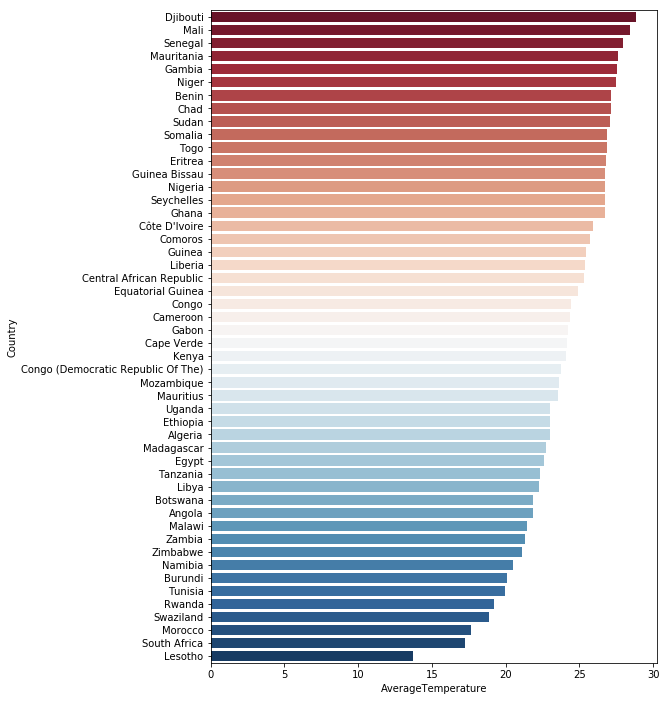

In [21]:
fig, ax = plt.subplots(figsize=(8,12)) 
ax = sns.barplot(x='AverageTemperature', y="Country", data=AverageTempPerCountry,palette="RdBu")
plt.show()


And from this bar plot we can see the highest and least average temperature countries in detail.

#### How does climate change over the years?

Let's see if climate tends to change (increase) over the years as a result of global warming or not by plotting the average temperature for Africa over the years.

In [22]:
YearlyAverageTempPerCountry = Data[['Year','AverageTemperature','AverageTemperatureUncertainty']].groupby(['Year']).mean().reset_index()
YearlyAverageTempPerCountry['UpperLimitTemp'] = YearlyAverageTempPerCountry['AverageTemperature']+YearlyAverageTempPerCountry['AverageTemperatureUncertainty']
YearlyAverageTempPerCountry['LowerLimitTemp'] = YearlyAverageTempPerCountry['AverageTemperature']-YearlyAverageTempPerCountry['AverageTemperatureUncertainty']
YearlyAverageTempPerCountry

,Year,AverageTemperature,AverageTemperatureUncertainty,UpperLimitTemp,LowerLimitTemp
0,1753,19.961250,3.046167,23.007417,16.915083
1,1754,20.038333,3.072083,23.110417,16.966250
2,1755,19.764583,3.785000,23.549583,15.979583
3,1756,20.229083,3.229167,23.458250,16.999917
4,1757,20.017417,4.193750,24.211167,15.823667
5,1758,18.685333,4.440750,23.126083,14.244583
6,1759,19.793500,4.203667,23.997167,15.589833
7,1760,19.304417,3.648583,22.953000,15.655833
8,1761,20.134833,3.190250,23.325083,16.944583
9,1762,20.085250,3.928000,24.013250,16.157250


In [23]:
UpperLimit = go.Scatter(
    x = YearlyAverageTempPerCountry['Year'], 
    y = YearlyAverageTempPerCountry['UpperLimitTemp'],
    mode='lines',
    name='Upper Limit',
    line=dict(
        color='rgb(244, 184, 96)',
    )
)
LowerLimit = go.Scatter(
    x = YearlyAverageTempPerCountry['Year'], 
    y = YearlyAverageTempPerCountry['LowerLimitTemp'],
    fill='tonexty',
    mode='lines',
    name='Lower Limit',
    line=dict(
        color='rgb(244, 184, 96)',
    )
)

AvgTemperature = go.Scatter(
    x = YearlyAverageTempPerCountry['Year'], 
    y = YearlyAverageTempPerCountry['AverageTemperature'],
    name='Average Temperature',
    line=dict(
        color='rgb(200, 62, 77)',
        #color='rgb(39, 40, 56)',
    )
)
data = [UpperLimit, LowerLimit, AvgTemperature]

layout = go.Layout(
    xaxis=dict(title='year'),
    yaxis=dict(title='Average Temperature, °C'),
    title='Yearly Average Temperature in Africa',
    showlegend = False)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

I think we all already know the answer. Unfortunately, there is global warming :(

### Which countries to visit in a specific month?

Let's start first by having a look at a bigger picture and see what is the average temperature for a Season per each Region

In [24]:
Regions_Temp = Data.groupby(['Region','Season'])['AverageTemperature'].mean().to_frame().reset_index()

Regions_Temp.merge(Data.groupby(['Region','Season'])['AverageTemperature'].min(),how='left',on=['Region','Season'])\
.merge(Data.groupby(['Region','Season'])['AverageTemperature'].mean(),how='left',on=['Region','Season'])\
.rename(columns={"AverageTemperature_x":'Max',"AverageTemperature_y":"Min","AverageTemperature":'Average'})

,Region,Season,Max,Min,Average
0,Central Africa,Autumn,22.976189,17.227000,22.976189
1,Central Africa,Spring,23.239982,16.881000,23.239982
2,Central Africa,Summer,24.343066,17.521000,24.343066
3,Central Africa,Winter,23.577761,17.548000,23.577761
4,East Africa,Autumn,24.222761,17.548000,24.222761
5,East Africa,Spring,24.934727,17.521000,24.934727
6,East Africa,Summer,24.190879,18.070000,24.190879
7,East Africa,Winter,23.820366,16.881000,23.820366
8,North Africa,Autumn,21.952263,11.268000,21.952263
9,North Africa,Spring,20.495080,10.902000,20.495080


for more close results let's take readings starting from 2000

In [25]:
Data['Month'] = 'Month_' + Data['Month'].astype(str)

In [26]:
Data2000 = Data[['AverageTemperature','Country','Month','Region']].loc[Data['Year']>2000]
Data2000=Data2000.groupby(['Region','Country','Month']).mean().unstack()

Data2000.head()

AverageTemperature            \
Month                                              Month_1  Month_10   
Region         Country                                                 
Central Africa Angola                            22.753385 24.254333   
               Burundi                           20.642692 21.416583   
               Cameroon                          24.549692 24.474333   
               Central African Republic          25.138385 25.202750   
               Chad                              22.195231 28.659500   

                                                                       \
Month                                    Month_11  Month_12   Month_2   
Region         Country                                                  
Central Africa Angola                   23.896333 22.983500 23.428000   
               Burundi                  20.509083 20.194667 20.957615   
               Cameroon                 24.932667 24.408000 26.358077   
               Central African Republic 25.459167 24.751417 27.780692   
               Chad                     26.261750 23.040250 25.431231   

                                                                       \
Month                                     Month_3   Month_4   Month_5   
Region         Country                                                  
Central Africa Angola                   23.681692 22.986923 21.757231   
               Burundi                  20.567769 20.465231 20.838615   
               Cameroon                 27.025231 26.736385 25.980000   
               Central African Republic 28.513538 27.977846 27.055923   
               Chad                     28.390000 31.033462 31.691615   

                                                                       \
Month                                     Month_6   Month_7   Month_8   
Region         Country                                                  
Central Africa Angola                   19.687231 19.493692 21.514154   
               Burundi                  20.667231 20.542923 21.385000   
               Cameroon                 24.715692 23.994692 23.886769   
               Central African Republic 25.700308 24.790846 24.788846   
               Chad                     31.138154 29.649923 28.815923   

                                                   
Month                                     Month_9  
Region         Country                             
Central Africa Angola                   23.806667  
               Burundi                  21.824583  
               Cameroon                 24.176167  
               Central African Republic 25.045833  
               Chad                     29.200417

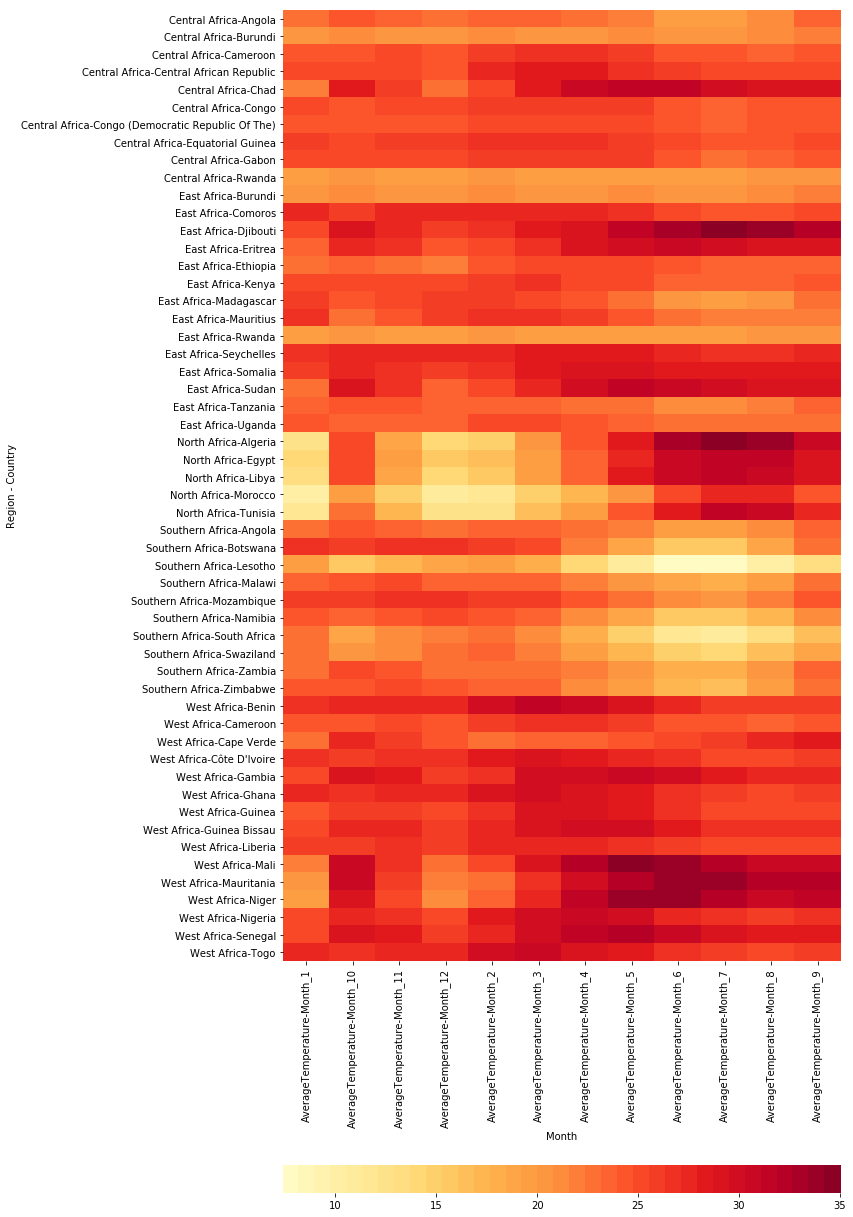

In [28]:
fig, ax = plt.subplots(figsize=(10,25)) 
ax = sns.heatmap(Data2000,cmap = sns.color_palette("YlOrRd", 35),cbar_kws={"orientation": "horizontal"})
ax.set(xlabel='Month', ylabel='Region - Country')
plt.show()

Here is a more detailed look for the temperature for each Month per Country.

### Conclusion

 We can see that there are countries that tend to have an all-year good temperature like Rwanda, Burundi, Lesotho and South Africa. Or, an all-year high temperature like Senegal, Togo. and that's of course due to geographical circumstances. While there are countries like Egypt which has a variation in temperature so you can choose the best time of the year that fit you.